In [16]:
# Read Fashion MNIST dataset

import util_mnist_reader
x_train, y_train = util_mnist_reader.load_mnist('../data/fashion', kind='train')
x_test, y_test = util_mnist_reader.load_mnist('../data/fashion', kind='t10k')

# Your code goes here . . .

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
from keras import optimizers

# plt.imshow(X_train)
i = 5
print(len(x_train), x_train.shape, len(y_train), y_train.shape, len(x_test), x_test.shape, len(y_test), y_test.shape)
a = (x_train[i])
b = np.reshape(a, (28,28))
# plt.imshow(b)
# plt.show()
print("\nLabel Values: ")
print(set(list(y_train)))

x_train = x_train[5000:]
x_valid = x_train[:5000]
y_train = y_train[5000:]
y_valid = y_train[:5000]

w,h = 28,28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)

print(x_train.shape, x_valid.shape, y_train.shape, y_valid.shape)
# random check with nine training examples
# np.random.seed(0); 
# indices = list(np.random.randint(X_train.shape[0],size=9))
# for i in range(9):
#     plt.subplot(3,3,i+1)
#     plt.imshow(X_train[indices[i]].reshape(28,28), cmap='gray', interpolation='none')
#     plt.title("Index {} Class {}".format(indices[i], y_train[indices[i]]))
#     plt.tight_layout()

mean_vals = np.mean(x_train, axis=0)
std_val = np.std(x_train)

x_train_centered = (x_train - mean_vals)/std_val
x_test_centered = (x_test - mean_vals)/std_val

y_train_onehot = keras.utils.to_categorical(y_train)

print('First 3 labels: ', y_train[:3])
print('\nFirst 3 labels (one-hot):\n', y_train_onehot[:3])


# initialize model
model = keras.models.Sequential()

# add input layer
model.add(keras.layers.Dense(
    units=50,
    input_dim=x_train_centered.shape[1],
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    activation='tanh') 
)
# add hidden layer
model.add(
    keras.layers.Dense(
        units=50,
        input_dim=50,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='tanh')
    )
# add output layer
model.add(
    keras.layers.Dense(
        units=y_train_onehot.shape[1],
        input_dim=50,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='softmax')
    )

# define SGD optimizer
sgd_optimizer = keras.optimizers.SGD(
    lr=0.001, decay=1e-7, momentum=0.9
)
# compile model
model.compile(
    optimizer=sgd_optimizer,
    loss='categorical_crossentropy'
)

# train model
# history = model.fit(
#     X_train_centered, y_train_onehot,
#     batch_size=64, epochs=50,
#     verbose=1, validation_split=0.1
# )

# y_train_pred = model.predict_classes(x_train_centered, verbose=0)
# print('First 3 predictions: ', y_train_pred[:3])

# calculate training accuracy
# y_train_pred = model.predict_classes(x_train_centered, verbose=0)
# correct_preds = np.sum(y_train == y_train_pred, axis=0)
# train_acc = correct_preds / y_train.shape[0]

# print(f'Training accuracy: {(train_acc * 100):.2f}')

# calculate testing accuracy
y_test_pred = model.predict_classes(x_test_centered, verbose=0)
correct_preds = np.sum(y_test == y_test_pred, axis=0)
test_acc = correct_preds / y_test.shape[0]

print(f'Test accuracy: {(test_acc * 100):.2f}')
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test acc', test_acc, test_loss)
def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum()

nums = np.array([4, 5, 6])
print(softmax(nums))

60000 (60000, 784) 60000 (60000,) 10000 (10000, 784) 10000 (10000,)

Label Values: 
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
(55000, 28, 28, 1) (5000, 28, 28, 1) (55000, 10) (5000, 10)
First 3 labels:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]

First 3 labels (one-hot):
 [[[1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [0. 1.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]]

 [[0. 1.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]]

 [[1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [1. 0.]
  [0. 1.]
  [1. 0.]
  [1. 0.]]]


ValueError: Error when checking input: expected dense_17_input to have 2 dimensions, but got array with shape (10000, 28, 28, 1)

In [19]:
m_train = 59000
m_validation = 1000

mask = list(range(m_train, m_train + m_validation))
X_val = X_train[mask]
y_val = y_train[mask]
len(X_val)
len(mask)


1000

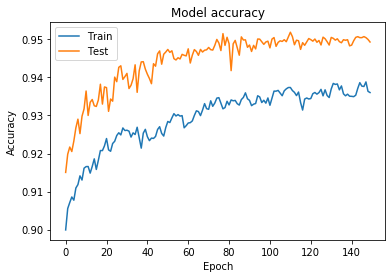

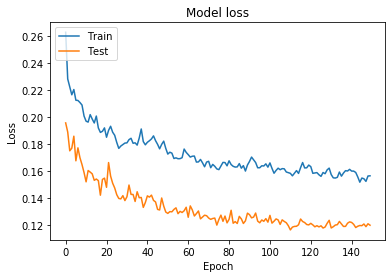

In [50]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [75]:
# history
# make class predictions with the model
from sklearn.metrics import multilabel_confusion_matrix, classification_report, accuracy_score

y_test_pred = model.predict_classes(x_test)
# summarize the first 5 cases
for i in range(3):
    a = (x_test[i])
    b = np.reshape(a, (28,28))
#     plt.imshow(b)
#     plt.show()
    print(predictions[i], y_test[i])
    
y_test_pred = tf.keras.utils.to_categorical(y_test_pred, 10)
print('Accuracy Score:', accuracy_score(y_test, y_test_pred))
confusion_matrix = multilabel_confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:\n', confusion_matrix)
print('classification_report', classification_report(y_test, y_test_pred))


9 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
2 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
1 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Accuracy Score: 0.7429
Confusion Matrix:
 [[[8763  237]
  [ 242  758]]

 [[8985   15]
  [ 104  896]]

 [[8200  800]
  [ 385  615]]

 [[8687  313]
  [ 158  842]]

 [[8539  461]
  [ 419  581]]

 [[8960   40]
  [ 180  820]]

 [[8734  266]
  [ 859  141]]

 [[8841  159]
  [ 105  895]]

 [[8880  120]
  [  58  942]]

 [[8840  160]
  [  61  939]]]
classification_report               precision    recall  f1-score   support

           0       0.76      0.76      0.76      1000
           1       0.98      0.90      0.94      1000
           2       0.43      0.61      0.51      1000
           3       0.73      0.84      0.78      1000
           4       0.56      0.58      0.57      1000
           5       0.95      0.82      0.88      1000
           6       0.35      0.14      0.20      1000
           7       0.85      0.90      0.87      1000
           8       0.89      0.94      0.91    

(60000, 784) (10000, 784)
(55000, 28, 28, 1) (55000, 10) (5000, 10)
Train on 55000 samples, validate on 10000 samples
Epoch 1/12
55000/55000 [==============================] - 32s 584us/step - loss: 2.4116 - accuracy: 0.7063 - val_loss: 0.4465 - val_accuracy: 0.8344
Epoch 2/12
55000/55000 [==============================] - 34s 613us/step - loss: 0.5207 - accuracy: 0.8173 - val_loss: 0.3914 - val_accuracy: 0.8561
Epoch 3/12
55000/55000 [==============================] - 31s 566us/step - loss: 0.4707 - accuracy: 0.8332 - val_loss: 0.5290 - val_accuracy: 0.8143
Epoch 4/12
55000/55000 [==============================] - 30s 540us/step - loss: 0.4338 - accuracy: 0.8413 - val_loss: 0.3751 - val_accuracy: 0.8598
Epoch 5/12
55000/55000 [==============================] - 30s 546us/step - loss: 0.4133 - accuracy: 0.8491 - val_loss: 0.3549 - val_accuracy: 0.8663
Epoch 6/12
55000/55000 [==============================] - 35s 638us/step - loss: 0.3960 - accuracy: 0.8540 - val_loss: 0.3422 - val_accur

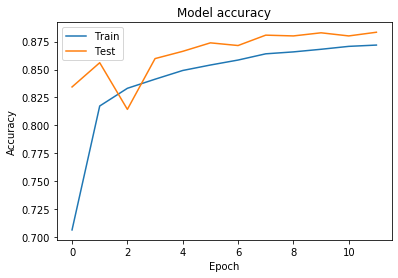

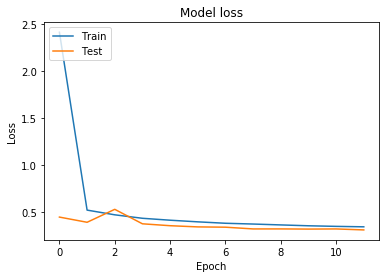

Accuracy Score: 0.8834
Confusion Matrix:
 [[[8835  165]
  [ 150  850]]

 [[8990   10]
  [  28  972]]

 [[8786  214]
  [ 202  798]]

 [[8908   92]
  [ 112  888]]

 [[8706  294]
  [ 169  831]]

 [[8979   21]
  [  32  968]]

 [[8751  249]
  [ 370  630]]

 [[8944   56]
  [  48  952]]

 [[8979   21]
  [  23  977]]

 [[8956   44]
  [  32  968]]]
classification_report               precision    recall  f1-score   support

           0       0.84      0.85      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.79      0.80      0.79      1000
           3       0.91      0.89      0.90      1000
           4       0.74      0.83      0.78      1000
           5       0.98      0.97      0.97      1000
           6       0.72      0.63      0.67      1000
           7       0.94      0.95      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.97      0.96      1000

   micro avg       0.88      0.88      0

In [99]:
import util_mnist_reader
x_train, y_train = util_mnist_reader.load_mnist('../data/fashion', kind='train')
x_test, y_test = util_mnist_reader.load_mnist('../data/fashion', kind='t10k')

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras import optimizers

print(x_train.shape, x_test.shape)
# X_train = x_train.reshape(55000,28,28,1)
# X_test = x_test.reshape(10000,28,28,1)
x_train = x_train[5000:]
x_valid = x_train[:5000]
y_train = y_train[5000:]
y_valid = y_train[:5000]

w,h = 28,28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)


print(x_train.shape, y_train.shape, y_valid.shape)
#create model
# cnn_model = Sequential()
#add model layers
# cnn_model.add(Conv2D(64, kernel_size=3, activation='tanh', input_shape=(28,28,1)))
# cnn_model.add(Conv2D(32, kernel_size=3, activation='tanh'))
# cnn_model.add(Flatten())
# cnn_model.add(Dense(10, activation='softmax'))

# sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#compile model using accuracy to measure model performance
# cnn_model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

#train the model 
# cnn_history = cnn_model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=300, batch_size=64)

model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3),
#                  activation='relu',
#                  input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3),input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

from sklearn.metrics import multilabel_confusion_matrix, classification_report, accuracy_score

y_test_pred = model.predict_classes(x_test) 
y_test_pred = tf.keras.utils.to_categorical(y_test_pred, 10)
print('Accuracy Score:', accuracy_score(y_test, y_test_pred))
confusion_matrix = multilabel_confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:\n', confusion_matrix)
print('classification_report', classification_report(y_test, y_test_pred))

In [159]:
from sklearn.metrics import multilabel_confusion_matrix, classification_report, accuracy_score, confusion_matrix
import util_mnist_reader
x_train, y_train = util_mnist_reader.load_mnist('../data/fashion', kind='train')
x_test, y_test = util_mnist_reader.load_mnist('../data/fashion', kind='t10k')

digits = 10
m = 60000

# shuffle_index = np.random.permutation(m)
# X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

n_x = x_train.shape[0]
n_h = 64
learning_rate = 1
digits=10
# W1 = np.random.randn(n_h, n_x)
# b1 = np.zeros((n_h, 1))
# W2 = np.random.randn(digits, n_h)
# b2 = np.zeros((digits, 1))
W1 = np.random.randn(n_x, 1)*0.01
b1 = 0
W2 = np.random.randn(n_x, 1)*0.01
b2 = 0

X = x_train
Y = y_train
print(Y.shape, X.shape)

def compute_multiclass_loss(Y, Y_hat):
    L_sum = np.sum(np.dot(Y.T, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

for i in range(2000):
    print('Y', Y.shape)
    Z1 = np.dot(W1.T, X) + b1
    A1 = sigmoid(Z1)
    print('w,b,z, p', W1.shape, X.shape, b1, Z1.shape, A1.shape)
    Z2 = np.dot(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)
#     print('p,o',Z2.shape, A2.shape)
    print('w,b,a1, z, p', W2.shape, b2, A1.shape,Z2.shape, A2.shape)

    cost = compute_multiclass_loss(Y, A2)
    print('50 line, A2, Y', A2.shape, Y.shape)
    dZ2 = np.subtract(A2, Y)
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.dot(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Z1 = np.matmul(W1, x_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

(60000, 10) (60000, 784)
Y (60000, 10)
w,b,z, p (60000, 1) (60000, 784) 0 (1, 784) (1, 784)
w,b,a1, z, p (60000, 1) 0 (1, 784) (60000, 784) (60000, 784)
50 line, A2, Y (60000, 784) (60000, 10)


ValueError: operands could not be broadcast together with shapes (60000,784) (60000,10) 

In [100]:

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))

(55000, 28, 28, 1)

In [168]:

import util_mnist_reader
x_train, y_train = util_mnist_reader.load_mnist('../data/fashion', kind='train')
x_test, y_test = util_mnist_reader.load_mnist('../data/fashion', kind='t10k')

x_train = x_train[5000:]
x_valid = x_train[:5000]
y_train = y_train[5000:]
y_valid = y_train[:5000]

# w,h = 28,28
# x_train = x_train.reshape(x_train.shape[0], w, h, 1)
# x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
# x_test = x_test.reshape(x_test.shape[0], w, h, 1)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
def sigmoid(s):
    return 1/(1 + np.exp(-s))

def sigmoid_derv(s):
    return s * (1 - s)

def softmax(s):
    exps = np.exp(s - np.max(s, axis=1, keepdims=True))
    return exps/np.sum(exps, axis=1, keepdims=True)

def cross_entropy(pred, real):
    n_samples = real.shape[0]
    res = pred - real
    return res/n_samples

def error(pred, real):
    n_samples = real.shape[0]
    logp = - np.log(pred[np.arange(n_samples), real.argmax(axis=1)])
    loss = np.sum(logp)/n_samples
    return loss

class MyNN:
    def __init__(self, x, y):
        self.x = x
        neurons = 128
        self.lr = 0.5
        ip_dim = x.shape[1]
        op_dim = y.shape[1]

        self.w1 = np.random.randn(ip_dim, neurons)
        self.b1 = np.zeros((1, neurons))
        self.w2 = np.random.randn(neurons, neurons)
        self.b2 = np.zeros((1, neurons))
        self.w3 = np.random.randn(neurons, op_dim)
        self.b3 = np.zeros((1, op_dim))
        self.y = y

    def feedforward(self):
        z1 = np.dot(self.x, self.w1) + self.b1
        self.a1 = sigmoid(z1)
        z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = sigmoid(z2)
        z3 = np.dot(self.a2, self.w3) + self.b3
        self.a3 = softmax(z3)
        
    def backprop(self):
        loss = error(self.a3, self.y)
        print('Error :', loss)
        a3_delta = cross_entropy(self.a3, self.y) # w3
        z2_delta = np.dot(a3_delta, self.w3.T)
        a2_delta = z2_delta * sigmoid_derv(self.a2) # w2
        z1_delta = np.dot(a2_delta, self.w2.T)
        a1_delta = z1_delta * sigmoid_derv(self.a1) # w1

        self.w3 -= self.lr * np.dot(self.a2.T, a3_delta)
        self.b3 -= self.lr * np.sum(a3_delta, axis=0, keepdims=True)
        self.w2 -= self.lr * np.dot(self.a1.T, a2_delta)
        self.b2 -= self.lr * np.sum(a2_delta, axis=0)
        self.w1 -= self.lr * np.dot(self.x.T, a1_delta)
        self.b1 -= self.lr * np.sum(a1_delta, axis=0)

    def predict(self, data):
        self.x = data
        self.feedforward()
        return self.a3.argmax()
			
model = MyNN(x_train, np.array(y_train))
print()
epochs = 1
for x in range(epochs):
    model.feedforward()
    model.backprop()
		
def get_acc(x, y):
    acc = 0
    for xx,yy in zip(x, y):
        s = model.predict(xx)
        if s == np.argmax(yy):
            acc +=1
    return acc/len(x)*100
	
print("Training accuracy : ", get_acc(x_train, np.array(y_train)))
print("Test accuracy : ", get_acc(x_val, np.array(y_val)))



Error : 10.979960732627614
Training accuracy :  18.68


ValueError: shapes (64,) and (784,128) not aligned: 64 (dim 0) != 784 (dim 0)

In [166]:
(x_train/16.0).shape

(55000, 784)

In [34]:
import util_mnist_reader
X_train, y_train = util_mnist_reader.load_mnist('../data/fashion', kind='train')
X_test, y_test = util_mnist_reader.load_mnist('../data/fashion', kind='t10k')

n_x = X_train.shape[1]
n_h = 32
learning_rate = 1

W1 = np.random.randn(n_x, n_h)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(n_h, 10)
b2 = np.zeros((10, 1))

X = X_train
Y = y_train

def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

for i in range(20):

    Z1 = np.dot(X,W1) + b1
    A1 = sigmoid(Z1)
    Z2 = W2 *A1 + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.dot(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.dot(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

ValueError: operands could not be broadcast together with shapes (60000,32) (32,1) 

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import util_mnist_reader
x_train, y_train = util_mnist_reader.load_mnist('../data/fashion', kind='train')
x_test, y_test = util_mnist_reader.load_mnist('../data/fashion', kind='t10k')
m_train = X_train.shape[0]
m_test = X_test.shape[0]
print("X_train shape: " + str(X_train.shape))
print("y_train shape: " + str(y_train.shape))
print("X_test shape: " + str(X_test.shape))
print("y_test shape: " + str(y_test.shape))
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))

# Subsample the data
# m_train = 59000
# m_validation = 1000

# mask = list(range(m_train, m_train + m_validation))
# X_val = X_train[mask]
# y_val = y_train[mask]

# mask = list(range(m_train))
# X_train = X_train[mask]
# y_train = y_train[mask]

# mask = list(range(m_test))
# X_test = X_test[mask]
# y_test = y_test[mask]

# Reshape data to rows, flatten the image
# x_train = x_train.reshape(x_train.shape[1], -1)
# X_val = _val.reshape(m_validation, -1)
# X_test = X_test.reshape(X_test.shape[1], -1)

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
# y_valid = keras.utils.to_categorical(y_valid, 10)
# plt.figure(figsize=(10,7))
# plt.scatter(X_train[:,0], X_train[:,1], c=labels, cmap='plasma', s=100, alpha=0.5)
# plt.show()
print("X_train shape: " + str(X_train.shape))
print("y_train shape: " + str(y_train.shape))
print("X_test shape: " + str(X_test.shape))
print("y_test shape: " + str(y_test.shape))
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) *(1-sigmoid (x))

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

instances = X_train.shape[0]
attributes = X_train.shape[1]
hidden_nodes = 15
output_labels = 10

wh = np.random.rand(attributes,hidden_nodes)
bh = np.random.randn(hidden_nodes)

wo = np.random.rand(hidden_nodes,output_labels)
bo = np.random.randn(output_labels)
lr = 10e-4

error_cost = []

for epoch in range(20):
############# feedforward

    # Phase 1
    zh = np.dot(X_train, wh) + bh
    print('z',zh.shape)
    ah = sigmoid(zh)
    print('ah', ah.shape)

    # Phase 2
    zo = np.dot(ah, wo) + bo
    print('zo',zo.shape)
    ao = softmax(zo)
    print('ao', ao.shape)

########## Back Propagation

########## Phase 1

    dcost_dzo = ao - y_train
    print('dcost_dzo',dcost_dzo.shape)
    dzo_dwo = ah
    print('dzo_dwo', dzo_dwo.shape)

    dcost_wo = (1/instances) * np.dot(dzo_dwo.T, dcost_dzo)
    print('dcost_wo', dcost_wo.shape)

    dcost_bo = (1/instances) * dcost_dzo

########## Phases 2

    dzo_dah = wo
    print('dzo_dah', dzo_dah.shape)
    print('dcost_dzo', dcost_dzo.shape)

    dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
    dah_dzh = sigmoid_der(zh)
    dzh_dwh = x_train
    dcost_wh = (1/instances) * np.dot(dzh_dwh, dah_dzh * dcost_dah)

    dcost_bh = (1/instances) * dcost_dah * dah_dzh

    # Update Weights ================

    wh -= lr * dcost_wh
    bh -= lr * dcost_bh.sum(axis=0)

    wo -= lr * dcost_wo
    bo -= lr * dcost_bo.sum(axis=0)

    if epoch % 2 == 0:
        loss = np.sum(-y_train * np.log(ao))
        print('Loss function value: ', loss)
        error_cost.append(loss)
        
plt.figure(1)
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.title('Cost Vs Epochs for Training and Validation Dataset')
plt.plot(error_cost,label='Training dataset', color='orange')
plt.legend(loc='upper right', fontsize='x-large')

test_p = sigmoid(np.dot(x_test, wh) + bh)  
y_test_pred = softmax(np.dot(test_p, wo) + bo)
ytrue = np.argmax(y_test,axis=1)
predicted = np.argmax(y_test_pred,axis=1)

print('ytrue', ytrue.shape)
print('predictions', predicted.shape)

print('Accuracy Score:', accuracy_score(ytrue, predicted))
confusion_matrix = confusion_matrix(ytrue, predicted)
print('Confusion Matrix:\n', confusion_matrix)

X_train shape: (60000, 784)
y_train shape: (60000,)
X_test shape: (10000, 784)
y_test shape: (10000,)
Number of training examples: m_train = 60000
Number of testing examples: m_test = 10000
X_train shape: (60000, 784)
y_train shape: (60000, 10)
X_test shape: (10000, 784)
y_test shape: (10000, 10)
z (60000, 15)
ah (60000, 15)
zo (60000, 10)
ao (60000, 10)
dcost_dzo (60000, 10)
dzo_dwo (60000, 15)
dcost_wo (15, 10)
dzo_dah (15, 10)
dcost_dzo (60000, 10)


ValueError: shapes (60000,784) and (60000,15) not aligned: 784 (dim 1) != 60000 (dim 0)

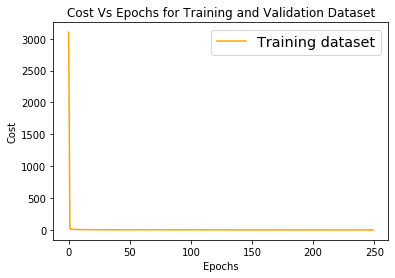

In [16]:
        
plt.figure(1)
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.title('Cost Vs Epochs for Training and Validation Dataset')
plt.plot(error_cost,label='Training dataset', color='orange')
plt.legend(loc='upper right', fontsize='x-large')

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import util_mnist_reader
x_train, y_train = util_mnist_reader.load_mnist('../data/fashion', kind='train')
x_test, y_test = util_mnist_reader.load_mnist('../data/fashion', kind='t10k')

feature_set = x_train
one_hot_labels = keras.utils.to_categorical(y_train, 10)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) *(1-sigmoid (x))

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

instances = feature_set.shape[0]
attributes = feature_set.shape[1]
hidden_nodes = 15
output_labels = 10

wh = np.random.rand(attributes,hidden_nodes)
bh = np.random.randn(hidden_nodes)

wo = np.random.rand(hidden_nodes,output_labels)
bo = np.random.randn(output_labels)
lr = 10e-4

error_cost = []

for epoch in range(50000):
############# feedforward

    # Phase 1
    zh = np.dot(feature_set, wh) + bh
    ah = sigmoid(zh)

    # Phase 2
    zo = np.dot(ah, wo) + bo
    ao = softmax(zo)

########## Back Propagation

########## Phase 1

    dcost_dzo = ao - one_hot_labels
    dzo_dwo = ah

    dcost_wo = np.dot(dzo_dwo.T, dcost_dzo)

    dcost_bo = dcost_dzo

########## Phases 2

    dzo_dah = wo
    dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
    dah_dzh = sigmoid_der(zh)
    dzh_dwh = feature_set
    dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)

    dcost_bh = dcost_dah * dah_dzh

    # Update Weights ================

    wh -= lr * dcost_wh
    bh -= lr * dcost_bh.sum(axis=0)

    wo -= lr * dcost_wo
    bo -= lr * dcost_bo.sum(axis=0)

    if epoch % 200 == 0:
        loss = np.sum(-one_hot_labels * np.log(ao))
        print('Loss function value: ', loss)
        error_cost.append(loss)


Loss function value:  170068.03060028903


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in multiply


Loss function value:  nan


KeyboardInterrupt: 

In [68]:
import util_mnist_reader
import keras
X_train, y_train = util_mnist_reader.load_mnist('../data/fashion', kind='train')
X_test, y_test = util_mnist_reader.load_mnist('../data/fashion', kind='t10k')
y_train = keras.utils.to_categorical(y_train, 10)

n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(10, n_h)
b2 = np.zeros((10, 1))

X = X_train
Y = y_train


def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum((np.mat(Y) * np.mat(np.log(Y_hat))))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L
for i in range(2000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

ValueError: operands could not be broadcast together with shapes (10,784) (60000,10) 

In [62]:
import numpy as np
import matplotlib.pyplot as plt
X_train, y_train = util_mnist_reader.load_mnist('../data/fashion', kind='train')
X_test, y_test = util_mnist_reader.load_mnist('../data/fashion', kind='t10k')

np.random.seed(42)

cat_images = np.random.randn(700, 2) + np.array([0, -3])
mouse_images = np.random.randn(700, 2) + np.array([3, 3])
dog_images = np.random.randn(700, 2) + np.array([-3, 3])

feature_set = X_train
labels = np.array([0]*700 + [1]*700 + [2]*700)
labels = y_train
one_hot_labels = np.zeros((60000, 10))

for i in range(60000):
    one_hot_labels[i, labels[i]] = 1

# plt.figure(figsize=(10,7))
# plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap='plasma', s=100, alpha=0.5)
# plt.show()

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) *(1-sigmoid (x))

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

instances = feature_set.shape[0]
attributes = feature_set.shape[1]
hidden_nodes = 15
output_labels = 10

wh = np.random.rand(attributes,hidden_nodes)
bh = np.random.randn(hidden_nodes)

wo = np.random.rand(hidden_nodes,output_labels)
bo = np.random.randn(output_labels)
lr = 10e-4

error_cost = []

for epoch in range(50000):
############# feedforward

    # Phase 1
    zh = np.dot(feature_set, wh) + bh
    ah = sigmoid(zh)

    # Phase 2
    zo = np.dot(ah, wo) + bo
    ao = softmax(zo)

########## Back Propagation

########## Phase 1

    dcost_dzo = ao - one_hot_labels
    dzo_dwo = ah

    dcost_wo = np.dot(dzo_dwo.T, dcost_dzo)

    dcost_bo = dcost_dzo

########## Phases 2

    dzo_dah = wo
    dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
    dah_dzh = sigmoid_der(zh)
    dzh_dwh = feature_set
    dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)

    dcost_bh = dcost_dah * dah_dzh

    # Update Weights ================

    wh -= lr * dcost_wh
    bh -= lr * dcost_bh.sum(axis=0)

    wo -= lr * dcost_wo
    bo -= lr * dcost_bo.sum(axis=0)

    if epoch % 200 == 0:
        loss = np.sum(-one_hot_labels * np.log(ao))
        print('Loss function value: ', loss)
        error_cost.append(loss)
        
# p_test = sigmoid(np.dot(x_test, w1) + b1)  
# y_test_pred = softmax(np.dot(p_test, w2) + b2)
# ytrue = np.argmax(y_test,axis=0)
# predicted = np.argmax(y_test_pred,axis=0)

#     zh = np.dot(feature_set, wh) + bh
#     ah = sigmoid(zh)

#     # Phase 2
#     zo = np.dot(ah, wo) + bo
#     ao = softmax(zo)
print('Accuracy Score:', accuracy_score(ytrue, predicted))
confusion_matrix = confusion_matrix(ytrue, predicted)
print('Confusion Matrix:\n', confusion_matrix)

Loss function value:  161187.02211457628


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:89: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:89: RuntimeWarning: invalid value encountered in multiply


Loss function value:  nan
Loss function value:  nan


KeyboardInterrupt: 

In [60]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
one_hot_labels = np.argmax(one_hot_labels,axis=1)
ao = np.argmax(ao,axis=1)
print('Accuracy Score:', accuracy_score(one_hot_labels, ao))
confusion_matrix = confusion_matrix(one_hot_labels, ao)
print('Confusion Matrix:\n', confusion_matrix)

AxisError: axis 1 is out of bounds for array of dimension 1

Shape:
X - x_train, x_valid, x_test: (55000, 784) (5000, 784) (10000, 784)
Y - y_train, y_valid, y_test: (55000,) (5000,) (10000,)
Shape:
X - x_train, x_valid, x_test: (55000, 784) (5000, 784) (10000, 784)
Y - y_train, y_valid, y_test: (55000, 10) (5000, 10) (10000, 10)
Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 64us/step - loss: 0.8330 - accuracy: 0.7113 - val_loss: 0.5679 - val_accuracy: 0.7942
Epoch 2/30
55000/55000 [==============================] - 3s 50us/step - loss: 0.6332 - accuracy: 0.7834 - val_loss: 0.5406 - val_accuracy: 0.8136
Epoch 3/30
55000/55000 [==============================] - 3s 57us/step - loss: 0.5918 - accuracy: 0.8007 - val_loss: 0.5506 - val_accuracy: 0.8070
Epoch 4/30
55000/55000 [==============================] - 3s 57us/step - loss: 0.5717 - accuracy: 0.8077 - val_loss: 0.5245 - val_accuracy: 0.8184
Epoch 5/30
55000/55000 [==============================] - 3s 54us/step - loss: 0.5555 - accu

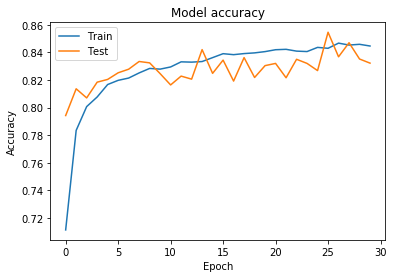

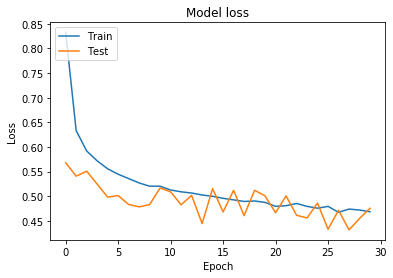

10000/10000 [==============================] - 0s 9us/step
Accuracy for Multilayer Network Model 85.75999736785889
Accuracy Score for Multilayer Network Model: 0.8576
Confusion Matrix [[826   2   7  58   5   1  86   0  15   0]
 [  3 956   2  27   5   0   5   0   2   0]
 [ 17   2 700  13 181   1  80   0   6   0]
 [ 21   9   2 891  39   1  33   0   4   0]
 [  0   1  69  34 828   0  62   0   6   0]
 [  0   0   0   1   0 935   0  42   4  18]
 [155   1  93  51 103   0 579   0  18   0]
 [  0   0   0   0   0  30   0 942   0  28]
 [  2   0   1   8   5   2  12   5 965   0]
 [  0   0   0   0   0   9   1  36   0 954]]
classification_report               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1000
           1       0.98      0.96      0.97      1000
           2       0.80      0.70      0.75      1000
           3       0.82      0.89      0.86      1000
           4       0.71      0.83      0.76      1000
           5       0.96      0.94     

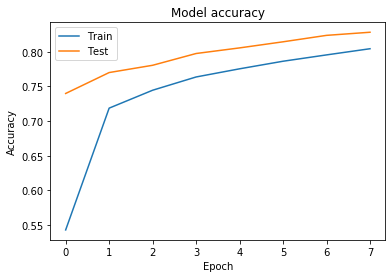

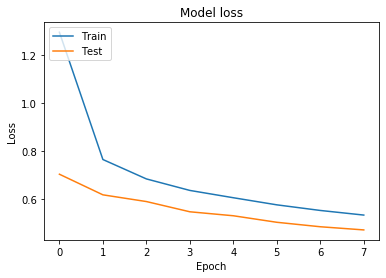

Accuracy for Convolutional Neural Network Model 82.81999826431274
Accuracy Score for Convolutional Neural Network Model: 0.8282
Confusion Matrix [[858   3  14  59   5   2  42   0  17   0]
 [  4 953   3  28   7   0   3   0   2   0]
 [ 25   1 638  11 232   2  79   0  12   0]
 [ 32  13  10 864  46   2  27   0   6   0]
 [  2   2  56  33 830   1  69   0   7   0]
 [  0   0   0   1   0 932   0  41   3  23]
 [261   1 102  39 186   1 386   0  24   0]
 [  0   0   0   0   0  36   0 916   0  48]
 [  5   1   8   7   5   4  11   4 953   2]
 [  0   0   0   0   0   8   0  39   1 952]]
classification_report               precision    recall  f1-score   support

           0       0.72      0.86      0.78      1000
           1       0.98      0.95      0.97      1000
           2       0.77      0.64      0.70      1000
           3       0.83      0.86      0.85      1000
           4       0.63      0.83      0.72      1000
           5       0.94      0.93      0.94      1000
           6       0.63

In [28]:

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix, classification_report, accuracy_score, confusion_matrix
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras import optimizers
import matplotlib.pyplot as plt

# Generate dummy data
import util_mnist_reader
x_train, y_train = util_mnist_reader.load_mnist('../data/fashion', kind='train')
x_test, y_test = util_mnist_reader.load_mnist('../data/fashion', kind='t10k')

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train = x_train[5000:]
x_valid = x_train[:5000]
y_train = y_train[5000:]
y_valid = y_train[:5000]


print('Shape:')
print('X - x_train, x_valid, x_test:', x_train.shape, x_valid.shape, x_test.shape)
print('Y - y_train, y_valid, y_test:', y_train.shape, y_valid.shape, y_test.shape)

# one hot encode output variable
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)

print('Shape:')
print('X - x_train, x_valid, x_test:', x_train.shape, x_valid.shape, x_test.shape)
print('Y - y_train, y_valid, y_test:', y_train.shape, y_valid.shape, y_test.shape)

def buildMultiLayerNetwork(x_train, x_valid, x_test):
    x_train = x_train.reshape(55000, 784)
    x_valid = x_valid.reshape(5000, 784)
    x_test = x_test.reshape(10000, 784)

    model = Sequential()
    # Dense(64) is a fully-connected layer with 64 hidden units.
    # in the first layer:
    model.add(Dense(64, activation='tanh', input_dim=784))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='tanh'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
              validation_data=(x_valid, y_valid),
              epochs=30,
              batch_size=28)
    print('Multilayer Neural Network Model')
    model.summary()
    print('Loss Vs Epoch for Multilayer Network Model')
    plotGraph(history)
    score = model.evaluate(x_test, y_test, batch_size=128)
    loss, accuracy = score
    print('Accuracy for Multilayer Network Model', accuracy*100)
    y_test_pred = model.predict_classes(x_test) 
    y_test_pred = keras.utils.to_categorical(y_test_pred, 10)
    print('Accuracy Score for Multilayer Network Model:', accuracy_score(y_test, y_test_pred))
    evaluateAccuracy(y_test_pred)

def buildConvolutionalNetwork(x_train, x_valid, x_test):
    w,h = 28,28
    x_train = x_train.reshape(x_train.shape[0], w, h, 1)
    x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
    x_test = x_test.reshape(x_test.shape[0], w, h, 1)
    print('Shape:')
    print('X - x_train, x_valid, x_test:', x_train.shape, x_valid.shape, x_test.shape)
    print('Y - y_train, y_valid, y_test:', y_train.shape, y_valid.shape, y_test.shape)

    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(28,28,1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.SGD(lr=0.1),
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
              batch_size=128,
              epochs=8,
              verbose=1,
              validation_data=(x_test, y_test))
    print('Convolutional Neural Network Model')
    model.summary()
    print('Loss Vs Epoch for Convolutional Neural Network Model')
    plotGraph(history)
    score = model.evaluate(x_test, y_test, verbose=0)

    y_test_pred = model.predict_classes(x_test) 
    y_test_pred = keras.utils.to_categorical(y_test_pred, 10)
    loss, accuracy = score
    print('Accuracy for Convolutional Neural Network Model', accuracy*100)
    print('Accuracy Score for Convolutional Neural Network Model:', accuracy_score(y_test, y_test_pred))
    evaluateAccuracy(y_test_pred)

def evaluateAccuracy(y_test_pred):
    predictions = np.argmax(y_test_pred, axis=1)
    ytrue = np.argmax(y_test,axis=1)
    matrix = confusion_matrix(ytrue, predictions)
    print('Confusion Matrix', matrix)
    print('classification_report', classification_report(y_test, y_test_pred))

      
def plotGraph(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

buildMultiLayerNetwork(x_train, x_valid, x_test)
buildConvolutionalNetwork(x_train, x_valid, x_test)  